Задание №1,2,3

/home/banana_cat/anaconda3/envs/my-environment/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/home/banana_cat/anaconda3/envs/my-environment/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Корни для f1(x) - Среднее: -0.0010352280755346745, Стандартное отклонение: 0.14111570421193834
Корни для f2(x) - Среднее: -0.792985621051422, Стандартное отклонение: 0.022465871551330296
Результаты для f1 (квадратичное уравнение):
Корень 1: 0.0, Погрешность: 0.047619047619047616
Корень 2: -0.0, Погрешность: 0.047619047619047616

Результаты для f2 (экспоненциальное уравнение):
Корень: -0.7925503345804223, Погрешность: 0.059627821030749935


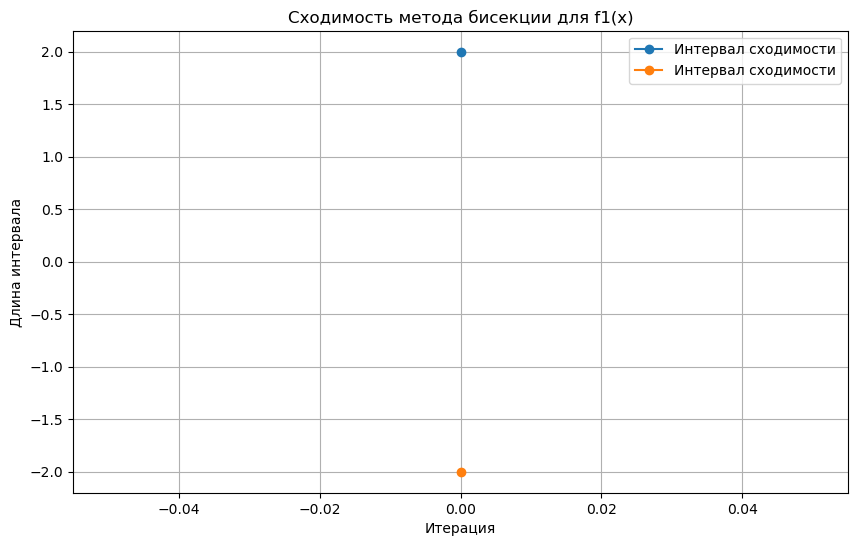

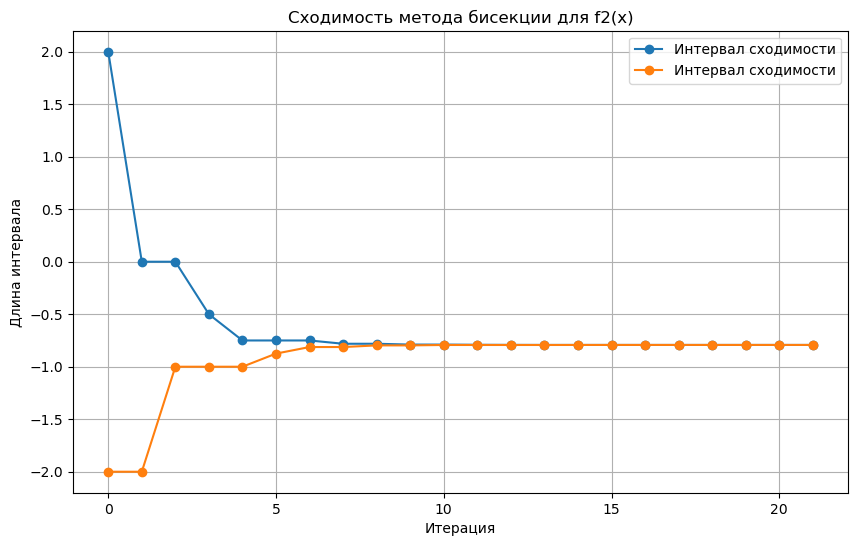

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Функции для уравнений
def f1(x, a0, a1, a2):
    """
    Квадратичное уравнение: f1(x) = a2 * x^2 + a1 * x + a0
    """
    return a2 * x**2 + a1 * x + a0

def f2(x, a0, a1, a2):
    """
    Экспоненциальное уравнение: f2(x) = exp(a2 * x) + a1 * x + a0
    """
    return np.exp(a2 * x) + a1 * x + a0

# Метод Монте-Карло для нахождения корней
def monte_carlo_method(func, a0_range, a1_range, a2_range, n_samples=10000):
    """
    Метод Монте-Карло для нахождения корней уравнения с неопределенностью коэффициентов.
    """
    roots = []
    for _ in range(n_samples):
        # Генерация случайных значений для коэффициентов
        a0 = np.random.uniform(*a0_range)
        a1 = np.random.uniform(*a1_range)
        a2 = np.random.uniform(*a2_range)
        
        # Нахождение корня с использованием fsolve
        root = fsolve(func, 0, args=(a0, a1, a2))[0]
        roots.append(root)
    
    return np.array(roots)

# Функции для оценки погрешности корней
def analytical_error_quadratic(a0_range, a1_range, a2_range):
    """
    Аналитическая оценка погрешности для квадратичного уравнения.
    """
    a0 = np.mean(a0_range)
    a1 = np.mean(a1_range)
    a2 = np.mean(a2_range)

    delta_a0 = (a0_range[1] - a0_range[0]) / 2
    delta_a1 = (a1_range[1] - a1_range[0]) / 2
    delta_a2 = (a2_range[1] - a2_range[0]) / 2

    discriminant = a1**2 - 4 * a2 * a0
    if discriminant < 0:
        return None

    root1 = (-a1 + np.sqrt(discriminant)) / (2 * a2)
    root2 = (-a1 - np.sqrt(discriminant)) / (2 * a2)

    # Производные корней по коэффициентам
    dr1_da0 = -1 / (2 * a2 * np.sqrt(discriminant)) if discriminant > 0 else 0
    dr1_da1 = -1 / (2 * a2)
    dr1_da2 = (a1**2 - 2 * a0 * a2) / (2 * a2**2 * np.sqrt(discriminant)) if discriminant > 0 else 0

    # Аналогично для второго корня
    dr2_da0 = -dr1_da0
    dr2_da1 = dr1_da1
    dr2_da2 = -dr1_da2

    # Оценка погрешности
    delta_root1 = abs(dr1_da0 * delta_a0) + abs(dr1_da1 * delta_a1) + abs(dr1_da2 * delta_a2)
    delta_root2 = abs(dr2_da0 * delta_a0) + abs(dr2_da1 * delta_a1) + abs(dr2_da2 * delta_a2)

    return (root1, delta_root1), (root2, delta_root2)

def analytical_error_exp(a0_range, a1_range, a2_range):
    """
    Аналитическая оценка погрешности для экспоненциального уравнения.
    """
    # Средние значения коэффициентов
    a0 = np.mean(a0_range)
    a1 = np.mean(a1_range)
    a2 = np.mean(a2_range)

    # Диапазон неопределенности коэффициентов
    delta_a0 = (a0_range[1] - a0_range[0]) / 2
    delta_a1 = (a1_range[1] - a1_range[0]) / 2
    delta_a2 = (a2_range[1] - a2_range[0]) / 2

    root = fsolve(f2, 0, args=(a0, a1, a2))[0]

    epsilon = 1e-6
    dr_da0 = (fsolve(f2, 0, args=(a0 + epsilon, a1, a2))[0] - root) / epsilon
    dr_da1 = (fsolve(f2, 0, args=(a0, a1 + epsilon, a2))[0] - root) / epsilon
    dr_da2 = (fsolve(f2, 0, args=(a0, a1, a2 + epsilon))[0] - root) / epsilon

    # Оценка погрешности
    delta_root = abs(dr_da0 * delta_a0) + abs(dr_da1 * delta_a1) + abs(dr_da2 * delta_a2)

    return root, delta_root

# Метод бисекции для нахождения корня
def bisection_method(func, a0_range, a1_range, a2_range, tol=1e-6, max_iter=100):
    a0 = np.mean(a0_range)
    a1 = np.mean(a1_range)
    a2 = np.mean(a2_range)

    # Устанавливаем начальные границы для x
    left, right = -2, 2  # Широкий диапазон для поиска корня
    intervals = [(left, right)]

    for _ in range(max_iter):
        midpoint = (left + right) / 2
        func_left = func(left, a0, a1, a2)
        func_mid = func(midpoint, a0, a1, a2)
        func_right = func(right, a0, a1, a2)

        if np.sign(func_left) == np.sign(func_right):
            left = left + (right - left) * 0.25
            right = right - (right - left) * 0.25
            continue

        if func_mid == 0 or (right - left) / 2 < tol:
            return midpoint, intervals

        # Редукция интервала
        if np.sign(func_left) * np.sign(func_mid) < 0:
            right = midpoint
        else:
            left = midpoint

        intervals.append((left, right))

    return midpoint, intervals

# Заданные диапазоны для коэффициентов
a0_range_f1 = [-0.1, 0.1]
a1_range_f1 = [-0.1, 0.1]
a2_range_f1 = [1.0, 1.1]

a0_range_f2 = [1.1, 1.2]
a1_range_f2 = [1.9, 2.1]
a2_range_f2 = [1.0, 1.1]

# Генерация корней методом Монте-Карло
roots_f1 = monte_carlo_method(f1, a0_range_f1, a1_range_f1, a2_range_f1)
roots_f2 = monte_carlo_method(f2, a0_range_f2, a1_range_f2, a2_range_f2)

# Оценка погрешности для корней методом Монте-Карло
mean_root_f1 = np.mean(roots_f1)
std_root_f1 = np.std(roots_f1)

mean_root_f2 = np.mean(roots_f2)
std_root_f2 = np.std(roots_f2)

print(f"Корни для f1(x) - Среднее: {mean_root_f1}, Стандартное отклонение: {std_root_f1}")
print(f"Корни для f2(x) - Среднее: {mean_root_f2}, Стандартное отклонение: {std_root_f2}")

# Оценка погрешности для f1 (квадратичное уравнение)
roots_f1_analytical = analytical_error_quadratic(a0_range_f1, a1_range_f1, a2_range_f1)
print("Результаты для f1 (квадратичное уравнение):")
print(f"Корень 1: {roots_f1_analytical[0][0]}, Погрешность: {abs(roots_f1_analytical[0][1])}")
print(f"Корень 2: {roots_f1_analytical[1][0]}, Погрешность: {abs(roots_f1_analytical[1][1])}")

# Оценка погрешности для f2 (экспоненциальное уравнение)
root_f2_analytical, delta_root_f2 = analytical_error_exp(a0_range_f2, a1_range_f2, a2_range_f2)
print("\nРезультаты для f2 (экспоненциальное уравнение):")
print(f"Корень: {root_f2_analytical}, Погрешность: {delta_root_f2}")

# Метод бисекции для f1 и f2
root_f1_bisection, intervals_f1 = bisection_method(f1, a0_range_f1, a1_range_f1, a2_range_f1)
root_f2_bisection, intervals_f2 = bisection_method(f2, a0_range_f2, a1_range_f2, a2_range_f2)

# Построение графика сходимости для f1
plt.figure(figsize=(10, 6))
plt.plot(range(len(intervals_f1)), [r for l, r in intervals_f1], marker='o', label='Интервал сходимости')
plt.plot(range(len(intervals_f1)), [l for l, r in intervals_f1], marker='o', label='Интервал сходимости')
plt.xlabel('Итерация')
plt.ylabel('Длина интервала')
plt.title('Сходимость метода бисекции для f1(x)')
plt.legend()
plt.grid(True)
plt.show()

# Построение графика сходимости для f2
plt.figure(figsize=(10, 6))
plt.plot(range(len(intervals_f2)), [r for l, r in intervals_f2], marker='o', label='Интервал сходимости')
plt.plot(range(len(intervals_f2)), [l for l, r in intervals_f2], marker='o', label='Интервал сходимости')
plt.xlabel('Итерация')
plt.ylabel('Длина интервала')
plt.title('Сходимость метода бисекции для f2(x)')
plt.legend()
plt.grid(True)
plt.show()


Задание №5

Средние значения корней (метод Монте-Карло): x = 0.0019965431756544354, y = 0.016257066003228807
Стандартное отклонение корней (метод Монте-Карло): x = 1.1361737705911925, y = 1.1486689365026332
Решение с использованием аналитической оценки погрешности: x = 0.0, y = 0.0
Оценка погрешности: Δx = 0.0, Δy = 0.0


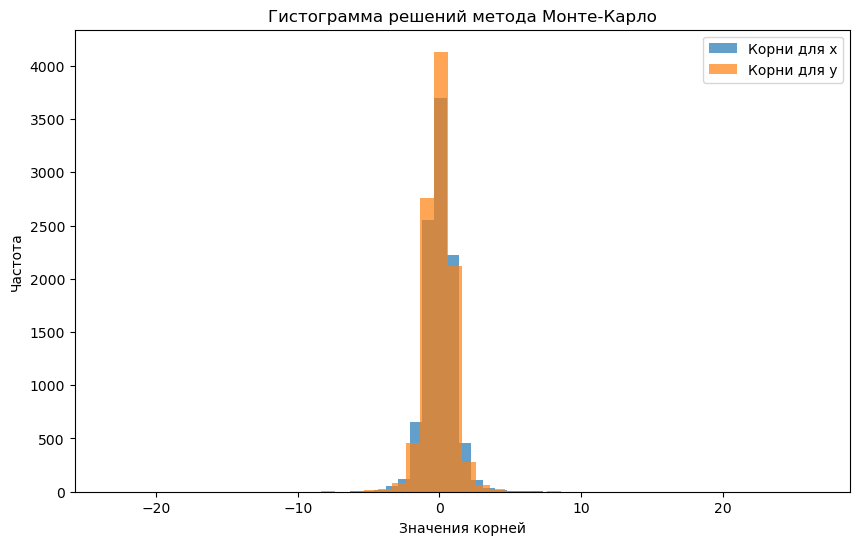

In [2]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Система уравнений
def f1(vars, a0, a1, a2):
    x, y = vars
    return a0 * x**2 + a1 * y + a2

def f2(vars, b0, b1, b2):
    x, y = vars
    return b0 * y**2 + b1 * x + b2

# Метод Монте-Карло для нахождения корней системы уравнений
def monte_carlo_method_system(a0_range, a1_range, a2_range, b0_range, b1_range, b2_range, n_samples=10000):
    solutions = []
    for _ in range(n_samples):
        # Генерация случайных значений для коэффициентов
        a0 = np.random.uniform(*a0_range)
        a1 = np.random.uniform(*a1_range)
        a2 = np.random.uniform(*a2_range)
        b0 = np.random.uniform(*b0_range)
        b1 = np.random.uniform(*b1_range)
        b2 = np.random.uniform(*b2_range)
        
        # Решение системы уравнений с использованием fsolve
        solution = fsolve(lambda vars: [f1(vars, a0, a1, a2), f2(vars, b0, b1, b2)], [0, 0])
        solutions.append(solution)
    
    return np.array(solutions)

# Аналитическая оценка погрешности для корней системы
def analytical_error_system(a0_range, a1_range, a2_range, b0_range, b1_range, b2_range):
    # Средние значения коэффициентов
    a0 = np.mean(a0_range)
    a1 = np.mean(a1_range)
    a2 = np.mean(a2_range)
    b0 = np.mean(b0_range)
    b1 = np.mean(b1_range)
    b2 = np.mean(b2_range)

    # Диапазоны неопределенности коэффициентов
    delta_a0 = (a0_range[1] - a0_range[0]) / 2
    delta_a1 = (a1_range[1] - a1_range[0]) / 2
    delta_a2 = (a2_range[1] - a2_range[0]) / 2
    delta_b0 = (b0_range[1] - b0_range[0]) / 2
    delta_b1 = (b1_range[1] - b1_range[0]) / 2
    delta_b2 = (b2_range[1] - b2_range[0]) / 2

    # Решение системы с усредненными коэффициентами
    root = fsolve(lambda vars: [f1(vars, a0, a1, a2), f2(vars, b0, b1, b2)], [0, 0])

    # Чувствительность корней к изменениям коэффициентов
    epsilon = 1e-6
    dr_da0 = (fsolve(lambda vars: [f1(vars, a0 + epsilon, a1, a2), f2(vars, b0, b1, b2)], [0, 0]) - root) / epsilon
    dr_da1 = (fsolve(lambda vars: [f1(vars, a0, a1 + epsilon, a2), f2(vars, b0, b1, b2)], [0, 0]) - root) / epsilon
    dr_da2 = (fsolve(lambda vars: [f1(vars, a0, a1, a2 + epsilon), f2(vars, b0, b1, b2)], [0, 0]) - root) / epsilon
    dr_db0 = (fsolve(lambda vars: [f1(vars, a0, a1, a2), f2(vars, b0 + epsilon, b1, b2)], [0, 0]) - root) / epsilon
    dr_db1 = (fsolve(lambda vars: [f1(vars, a0, a1, a2), f2(vars, b0, b1 + epsilon, b2)], [0, 0]) - root) / epsilon
    dr_db2 = (fsolve(lambda vars: [f1(vars, a0, a1, a2), f2(vars, b0, b1, b2 + epsilon)], [0, 0]) - root) / epsilon

    # Оценка погрешности
    delta_root = np.abs(dr_da0 * delta_a0) + np.abs(dr_da1 * delta_a1) + np.abs(dr_da2 * delta_a2) + \
                 np.abs(dr_db0 * delta_b0) + np.abs(dr_db1 * delta_b1) + np.abs(dr_db2 * delta_b2)

    return root, delta_root

# Диапазоны для коэффициентов
a0_range = [-1, 1]
a1_range = [-1, 1]
a2_range = [-1, 1]
b0_range = [-1, 1]
b1_range = [-1, 1]
b2_range = [-1, 1]

# Генерация корней методом Монте-Карло
solutions_mc = monte_carlo_method_system(a0_range, a1_range, a2_range, b0_range, b1_range, b2_range)

# Оценка погрешности для корней
root_analytical, delta_root_analytical = analytical_error_system(a0_range, a1_range, a2_range, b0_range, b1_range, b2_range)

# Вывод результатов
print(f"Средние значения корней (метод Монте-Карло): x = {np.mean(solutions_mc[:, 0])}, y = {np.mean(solutions_mc[:, 1])}")
print(f"Стандартное отклонение корней (метод Монте-Карло): x = {np.std(solutions_mc[:, 0])}, y = {np.std(solutions_mc[:, 1])}")
print(f"Решение с использованием аналитической оценки погрешности: x = {root_analytical[0]}, y = {root_analytical[1]}")
print(f"Оценка погрешности: Δx = {delta_root_analytical[0]}, Δy = {delta_root_analytical[1]}")

# Построение гистограммы решений метода Монте-Карло
plt.figure(figsize=(10, 6))
plt.hist(solutions_mc[:, 0], bins=50, alpha=0.7, label='Корни для x')
plt.hist(solutions_mc[:, 1], bins=50, alpha=0.7, label='Корни для y')
plt.legend(loc='best')
plt.title('Гистограмма решений метода Монте-Карло')
plt.xlabel('Значения корней')
plt.ylabel('Частота')
plt.show()
